In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from kneed import KneeLocator
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
file_path='Brain_GSE50161.csv'

In [4]:
df=pd.read_csv(file_path)

In [5]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [6]:
df.shape

(130, 54677)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB


In [8]:
df.columns

Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54677)

In [9]:
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,898.500000,12.276393,8.769583,7.722634,9.160209,4.842069,7.968388,6.800111,6.472452,6.068968,...,12.371075,11.812911,13.793913,13.619041,5.206208,4.811666,3.916795,3.701539,4.627912,4.633377
std,37.671829,0.790160,0.673396,1.037339,0.615369,0.922003,0.630260,0.537431,0.659847,0.904152,...,0.609813,0.618190,0.320124,0.309078,0.220767,0.219851,0.165917,0.180251,0.160663,0.192353
min,834.000000,10.156207,6.627878,6.222515,8.044421,3.682762,6.560920,5.910571,5.515079,4.491771,...,9.979005,9.926470,12.719785,12.777792,4.680072,4.247758,3.530287,3.432622,4.278812,4.050006
25%,866.250000,11.679721,8.378760,7.007678,8.595505,4.207043,7.533713,6.389605,5.935051,5.462356,...,12.056825,11.359850,13.605871,13.392790,5.031176,4.684169,3.807447,3.589381,4.530391,4.519694
50%,898.500000,12.502518,8.786242,7.521674,9.194487,4.462729,7.915062,6.654785,6.401447,5.856087,...,12.415320,11.768853,13.774338,13.614493,5.214618,4.785318,3.912025,3.674620,4.607167,4.603287
75%,930.750000,12.883374,9.211098,8.249157,9.707397,5.276685,8.385912,7.143818,6.985782,6.476124,...,12.757924,12.230375,13.969533,13.813191,5.324326,4.950025,4.009166,3.744824,4.718997,4.736634
max,963.000000,13.655639,10.716003,12.054143,10.407136,7.404503,10.164655,8.110006,8.812959,8.646862,...,13.480002,13.022222,14.476079,14.273778,5.904952,5.619512,4.547821,4.854368,5.420217,5.436919


In [10]:
df.isnull().sum()

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64

In [11]:
df.type.unique()

array(['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal',
       'pilocytic_astrocytoma'], dtype=object)

In [12]:
df.type.value_counts()

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64

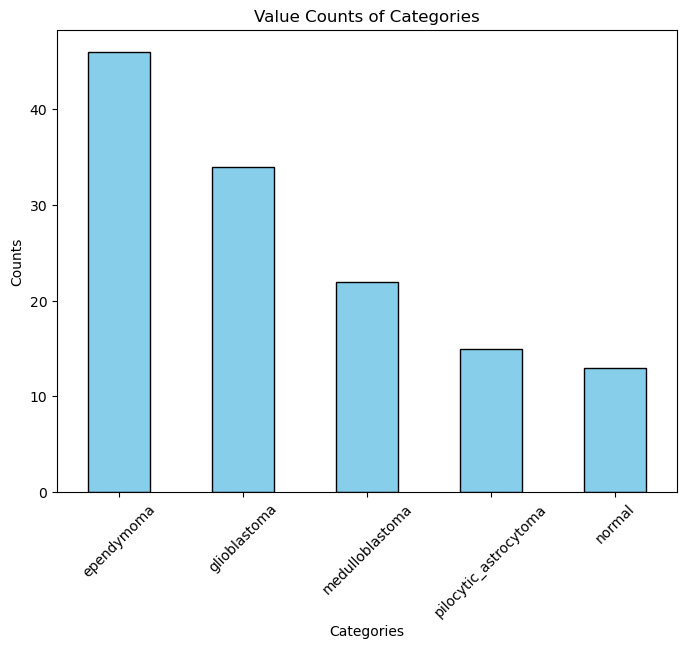

In [13]:
counts = df.type.value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  #
counts.plot(kind='bar', color='skyblue', edgecolor='black') 
plt.title('Value Counts of Categories')  
plt.xlabel('Categories') 
plt.ylabel('Counts')  
plt.xticks(rotation=45)  

plt.show()

In [14]:

if 'samples' in df.columns:
    df = df.drop(columns=['samples'])





In [15]:
X = df.drop(columns=['type'])
y = df['type']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (130, 54675)
Target shape: (130,)


### Label Encoding

In [16]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nClasses mapping:")
for i, cls in enumerate(le.classes_):
    print(f"{cls} --> {i}")



Classes mapping:
ependymoma --> 0
glioblastoma --> 1
medulloblastoma --> 2
normal --> 3
pilocytic_astrocytoma --> 4


### Scaling

In [17]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### Feature Selection

In [18]:
import numpy as np

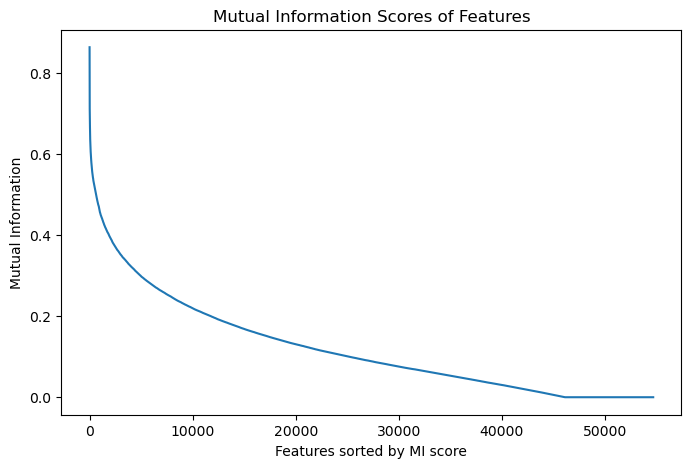

Optimal number of features (k) according to MI + KneeLocator: 336


In [19]:
mi_scores = mutual_info_classif(X_scaled, y_encoded)
mi_scores_sorted = np.sort(mi_scores)[::-1]

# Plot MI scores
plt.figure(figsize=(8,5))
plt.plot(mi_scores_sorted)
plt.xlabel("Features sorted by MI score")
plt.ylabel("Mutual Information")
plt.title("Mutual Information Scores of Features")
plt.show()
 

# Find optimal k using KneeLocator                         

kneedle = KneeLocator(range(len(mi_scores_sorted)), mi_scores_sorted, curve='convex', direction='decreasing')
optimal_k = kneedle.knee
print("Optimal number of features (k) according to MI + KneeLocator:", optimal_k)


In [20]:
#  Select top k features
selector = SelectKBest(mutual_info_classif, k=optimal_k)
X_selected = selector.fit_transform(X_scaled, y_encoded)
print("Shape after feature selection:", X_selected.shape)

Shape after feature selection: (130, 336)


In [21]:
#  Select top k features
selector = SelectKBest(mutual_info_classif, k=optimal_k)
X_selected = selector.fit_transform(X_scaled, y_encoded)
print("Shape after feature selection:", X_selected.shape)

Shape after feature selection: (130, 336)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [29]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [30]:
print("\nSVM (RBF) Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM (RBF) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3
           4       0.75      1.00      0.86         3

    accuracy                           0.92        26
   macro avg       0.93      0.93      0.92        26
weighted avg       0.94      0.92      0.92        26

Confusion Matrix:
[[8 0 0 0 1]
 [0 7 0 0 0]
 [0 1 3 0 0]
 [0 0 0 3 0]
 [0 0 0 0 3]]


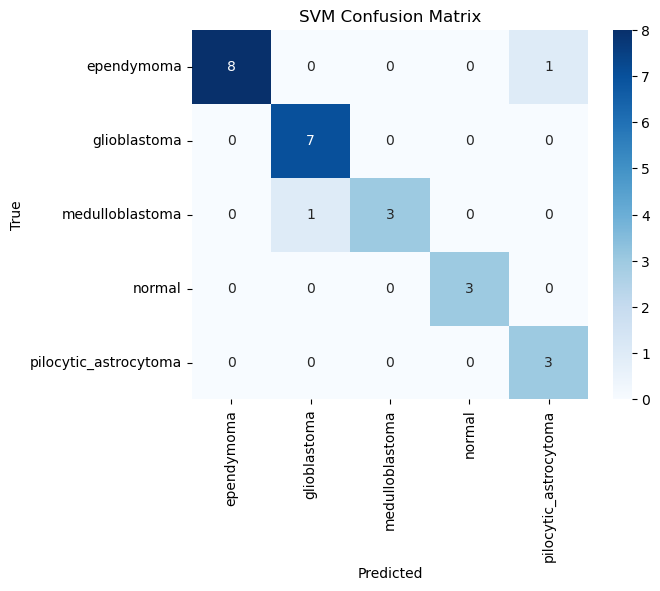

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()


In [31]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.78      1.00      0.88         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.92        26
   macro avg       0.96      0.93      0.93        26
weighted avg       0.94      0.92      0.92        26

Confusion Matrix:
[[8 1 0 0 0]
 [0 7 0 0 0]
 [0 1 3 0 0]
 [0 0 0 3 0]
 [0 0 0 0 3]]


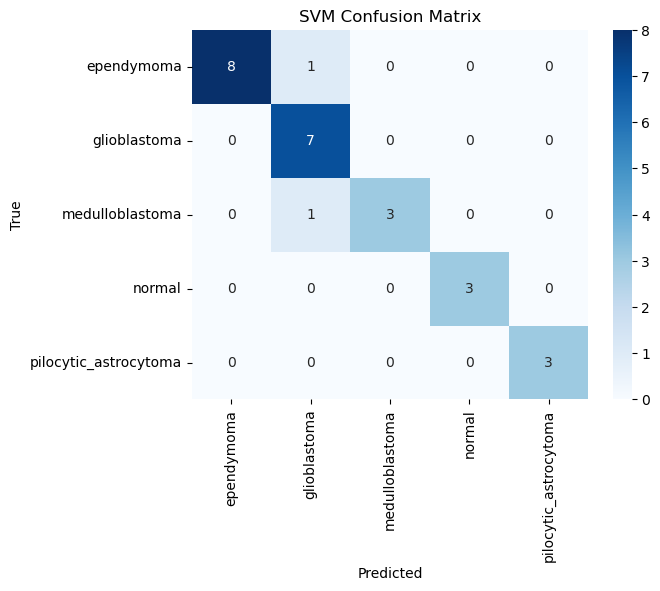

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()


### cross validation

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_selected, y_encoded, cv=5)
print("RF CV Accuracy:", scores.mean())


RF CV Accuracy: 0.9384615384615385


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, X_selected, y_encoded, cv=5)
print("SVM CV Accuracy:", scores.mean())


SVM CV Accuracy: 0.9461538461538461


### Tuning

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C':[0.1,1,10,100], 'gamma':[0.01,0.1,1,10]}
grid_svm = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=42), param_grid, cv=5)
grid_svm.fit(X_selected, y_encoded)
print("Best SVM params:", grid_svm.best_params_)
print("Best CV score:", grid_svm.best_score_)


Best SVM params: {'C': 1, 'gamma': 0.01}
Best CV score: 0.923076923076923


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_selected, y_encoded)
print("Best RF params:", grid.best_params_)
print("Best RF CV score:", grid.best_score_)


Best RF params: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}
Best RF CV score: 0.9461538461538461


In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

y_pred_cv = cross_val_predict(grid_svm, X_selected, y_encoded, cv=5)
print("Final Model Classification Report:")
print(classification_report(y_encoded, y_pred_cv))
print("Confusion Matrix:")
print(confusion_matrix(y_encoded, y_pred_cv))


Final Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.82      0.94      0.88        34
           2       1.00      0.95      0.98        22
           3       0.92      0.85      0.88        13
           4       0.87      0.87      0.87        15

    accuracy                           0.92       130
   macro avg       0.92      0.91      0.91       130
weighted avg       0.93      0.92      0.92       130

Confusion Matrix:
[[43  2  0  0  1]
 [ 0 32  0  1  1]
 [ 0  1 21  0  0]
 [ 0  2  0 11  0]
 [ 0  2  0  0 13]]


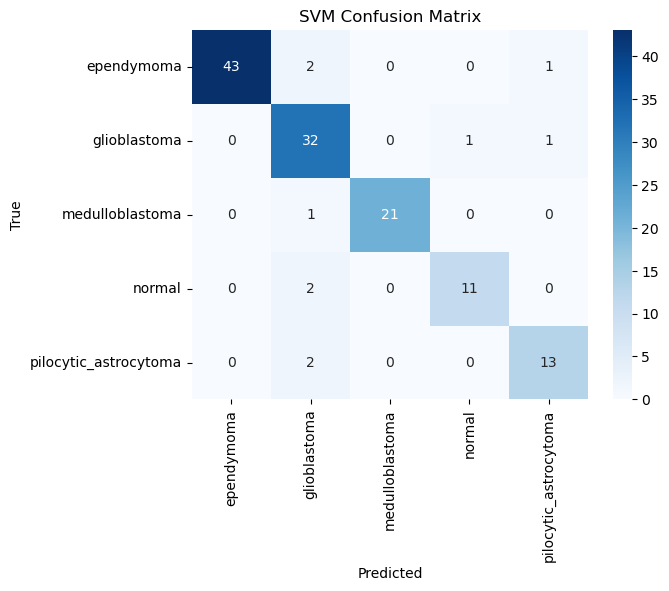

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_encoded, y_pred_cv)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()


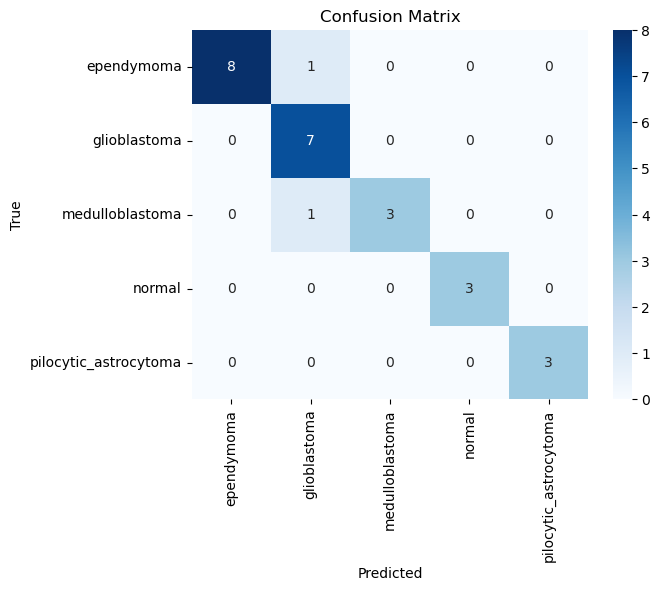

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix') 
plt.show()
